In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

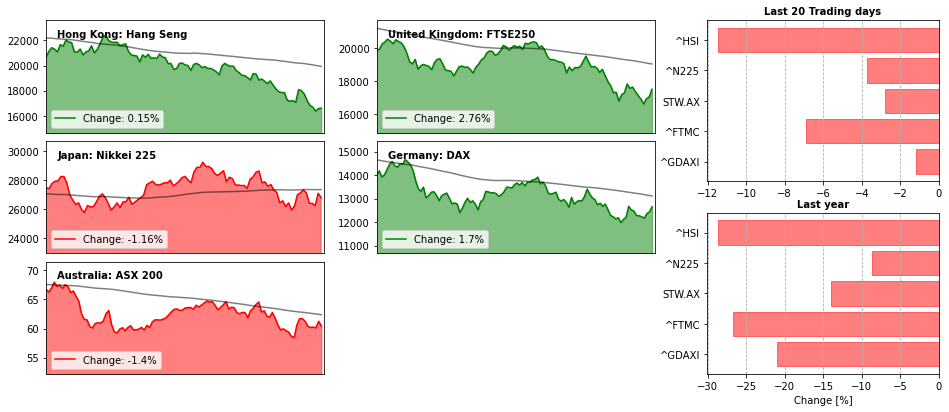

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 18-10-2022 at 09:29:29


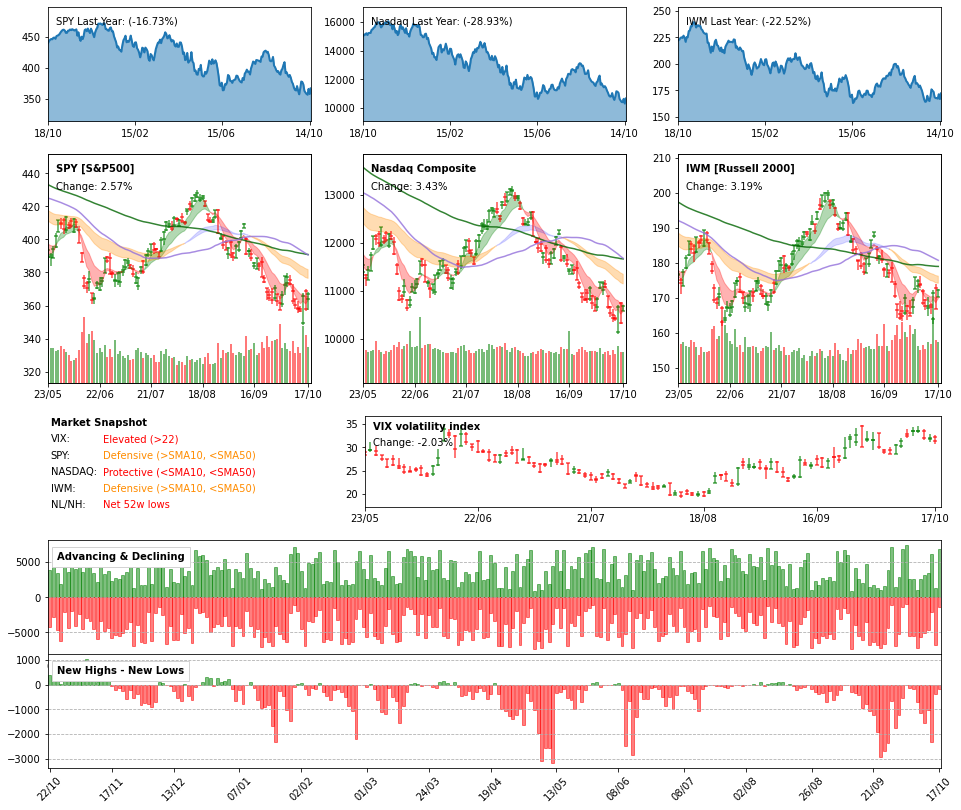

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

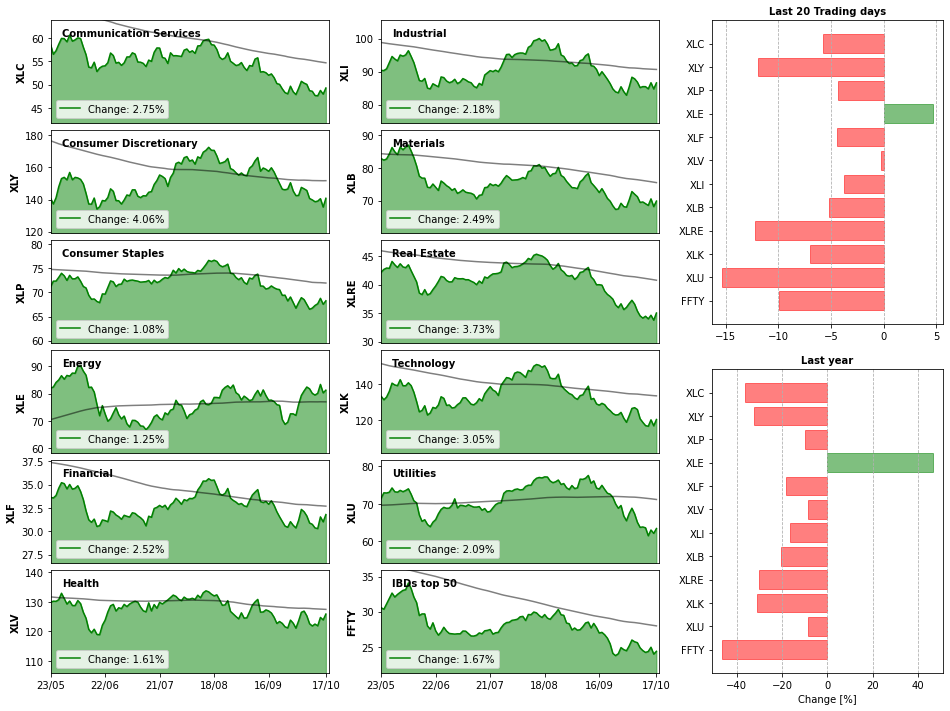

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Coking Coal,2.73,18.52,-14.76,50.37,0.82,2.15,0
Thermal Coal,-1.03,11.36,4.17,76.64,0.89,2.88,2
Oil & Gas Refining & Marketing,2.66,11.28,7.74,31.02,1.02,1.62,-1
Paper & Paper Products,0.84,9.63,-9.51,1.51,1.23,3.70,-1
Oil & Gas Equipment & Services,2.41,6.13,-18.39,10.82,0.83,2.69,4
Department Stores,6.45,4.60,-29.50,-17.18,0.80,6.69,10
Trucking,0.80,4.04,4.72,-18.98,0.99,3.12,11
Oil & Gas Integrated,1.07,2.89,-3.45,27.25,0.85,1.31,2
Steel,2.18,2.53,-29.79,-12.21,0.76,2.78,4
Airports & Air Services,4.93,2.30,-0.66,-11.70,1.20,2.70,18


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
REIT - Office,5.36,-12.73,-35.64,-37.54,1.31,3.22,-8
Electrical Equipment & Parts,-1.80,-12.98,-13.86,-30.85,0.77,3.17,2
Uranium,-3.39,-13.20,-27.77,-16.48,1.19,7.23,4
Utilities - Diversified,-0.15,-13.82,-21.06,-4.13,1.34,2.61,-4
REIT - Healthcare Facilities,4.30,-15.32,-30.67,-29.14,1.05,3.17,-2
REIT - Specialty,0.84,-16.74,-26.04,-24.77,1.17,3.65,0
Semiconductor Equipment & Materials,-7.55,-17.41,-32.56,-44.95,1.28,1.60,-2
REIT - Mortgage,6.80,-19.96,-30.61,-40.98,0.99,2.13,0
Auto Manufacturers,-0.55,-22.08,-30.57,-31.00,0.96,4.94,0
Solar,-8.44,-26.36,7.48,-12.26,0.98,0.46,0


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Engineering & Construction,1.90,-3.02,-10.96,-11.22,3.97,3.64,14.450800
Utilities - Renewable,1.55,-12.34,-6.46,-5.50,2.82,5.06,14.269200
Uranium,-3.39,-13.20,-27.77,-16.48,1.19,7.23,8.603700
Electronic Gaming & Multimedia,-0.40,-4.18,-19.63,-55.73,1.84,3.60,6.624000
Internet Retail,-1.21,-9.44,-23.31,-41.14,1.01,6.19,6.251900
Industrial Distribution,0.09,-2.60,-9.36,-12.67,1.42,3.91,5.552200
REIT - Industrial,4.02,-8.07,-30.57,-19.31,1.16,4.75,5.510000
Department Stores,6.45,4.60,-29.50,-17.18,0.80,6.69,5.352000
Insurance - Property & Casualty,1.92,0.38,-6.85,6.09,3.10,1.66,5.146000
Software - Application,-0.13,-8.32,-24.42,-51.75,0.99,4.80,4.752000


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

IndexError: list index out of range

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0